In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#ruta=r"D:\ACCIONA\Costanera\base_generacion"
#id_central=[191,192,193,111,74,135,73,77]

#Eolica Alena	1690
#Eolico La Flor	611
#Eólica Cuel x10	251
#Eólica Cuel x12	251
#Eólica La Esperanza	360
#Eólica Los Buenos Aires	345
#Eólica Negrete	1667
#Eolica Aurora	512
#Eolica Malleco norte	1706
#Eolica Malleco sur	1707
#Eólica Renaico	342
#Eólica San Gabriel	544
#Eólico Los Guindos	296
#Tolpan Sur	626
#Eólica San Pedro I	268
#Eólica San Pedro II	366

ruta=r"C:\Users\adria\Documents\Trabajo_python\web_scraping\data_generacion"
id_central=[1690,611,251,360,345,1667,512,1706,1707,342,544,626,268,366,266]

In [3]:
meses=["1","2","3","4","5","6","7","8","9","10","11","12"]
anos=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]

In [4]:
df3=None
for a in anos:
    for m in meses:
        df1=None
        df2=None
        try:
            df1=pd.read_csv(ruta+"\\"+ a +"-"+ m +".tsv", sep='\t')
            df2=df1[df1["central_infotecnica_id"].isin(id_central)].copy()
            df3=pd.concat([df3,df2])
        except:
            pass

In [5]:
df3

,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh
167,2013-12-01,1,251,PE CUEL,Eólica,eolica,0.000,0.000
343,2013-12-01,2,251,PE CUEL,Eólica,eolica,0.000,0.000
512,2013-12-01,3,251,PE CUEL,Eólica,eolica,0.000,0.000
771,2013-12-01,4,251,PE CUEL,Eólica,eolica,0.000,0.000
856,2013-12-01,5,251,PE CUEL,Eólica,eolica,0.000,0.000
...,...,...,...,...,...,...,...,...
61594,2022-06-04,8,544,PE SAN GABRIEL,Eólica,eolica,21.862,21.862
61598,2022-06-04,8,611,PE LA FLOR,Eólica,eolica,4.110,4.110
61600,2022-06-04,8,626,PE TOLPAN SUR,Eólica,eolica,12.253,12.253
61649,2022-06-04,9,360,PE LA ESPERANZA,Eólica,eolica,0.030,0.030


In [23]:
df3[df3["central_infotecnica_id"]==264]

,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh,fecha,fecha2


In [6]:
df3["central_infotecnica_id"].unique()

array([ 251,  268,  345,  342,  360,  366,  512,  544,  611,  626, 1667,
       1706, 1707, 1690], dtype=int64)

In [7]:
def agruparFecha(x):
    aux=0    
    if x[1]==1:
        aux=0
    elif x[1]==2:
        aux=1
    elif x[1]==3:
        aux=2
    elif x[1]==4:
        aux=3
    elif x[1]==5:
        aux=4
    elif x[1]==6:
        aux=5
    elif x[1]==7:
        aux=6
    elif x[1]==8:
        aux=7
    elif x[1]==9:
        aux=8
    elif x[1]==10:
        aux=9
    elif x[1]==11:
        aux=10
    elif x[1]==12:
        aux=11
    elif x[1]==13:
        aux=12
    elif x[1]==14:
        aux=13
    elif x[1]==15:
        aux=14
    elif x[1]==16:
        aux=15
    elif x[1]==17:
        aux=16
    elif x[1]==18:
        aux=17
    elif x[1]==19:
        aux=18
    elif x[1]==20:
        aux=19
    elif x[1]==21:
        aux=20
    elif x[1]==22:
        aux=21
    elif x[1]==23:
        aux=22
    elif x[1]==24:
        aux=23
        
    resultado=str(x[0]) + ' ' + str(aux) + ':00:00'
    return resultado

In [8]:
df3["fecha"]=df3[["fecha_opreal","hora_opreal"]].apply(agruparFecha,axis=1)

In [9]:
df3["fecha"].unique()

array(['2013-12-01 0:00:00', '2013-12-01 1:00:00', '2013-12-01 2:00:00',
       ..., '2022-06-04 6:00:00', '2022-06-04 7:00:00',
       '2022-06-04 8:00:00'], dtype=object)

In [10]:
df3["fecha2"]=pd.to_datetime(df3["fecha"])

In [11]:
df3

,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh,fecha,fecha2
167,2013-12-01,1,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 0:00:00,2013-12-01 00:00:00
343,2013-12-01,2,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 1:00:00,2013-12-01 01:00:00
512,2013-12-01,3,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 2:00:00,2013-12-01 02:00:00
771,2013-12-01,4,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 3:00:00,2013-12-01 03:00:00
856,2013-12-01,5,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 4:00:00,2013-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
61594,2022-06-04,8,544,PE SAN GABRIEL,Eólica,eolica,21.862,21.862,2022-06-04 7:00:00,2022-06-04 07:00:00
61598,2022-06-04,8,611,PE LA FLOR,Eólica,eolica,4.110,4.110,2022-06-04 7:00:00,2022-06-04 07:00:00
61600,2022-06-04,8,626,PE TOLPAN SUR,Eólica,eolica,12.253,12.253,2022-06-04 7:00:00,2022-06-04 07:00:00
61649,2022-06-04,9,360,PE LA ESPERANZA,Eólica,eolica,0.030,0.030,2022-06-04 8:00:00,2022-06-04 08:00:00


In [12]:
df3.to_csv(ruta + "\data.csv",encoding="utf-8")

In [13]:
df4=df3.copy()

In [14]:
df4.index=df4["fecha2"]

In [15]:
df4

,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh,fecha,fecha2
fecha2,,,,,,,,,,
2013-12-01 00:00:00,2013-12-01,1,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 0:00:00,2013-12-01 00:00:00
2013-12-01 01:00:00,2013-12-01,2,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 1:00:00,2013-12-01 01:00:00
2013-12-01 02:00:00,2013-12-01,3,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 2:00:00,2013-12-01 02:00:00
2013-12-01 03:00:00,2013-12-01,4,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 3:00:00,2013-12-01 03:00:00
2013-12-01 04:00:00,2013-12-01,5,251,PE CUEL,Eólica,eolica,0.000,0.000,2013-12-01 4:00:00,2013-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
2022-06-04 07:00:00,2022-06-04,8,544,PE SAN GABRIEL,Eólica,eolica,21.862,21.862,2022-06-04 7:00:00,2022-06-04 07:00:00
2022-06-04 07:00:00,2022-06-04,8,611,PE LA FLOR,Eólica,eolica,4.110,4.110,2022-06-04 7:00:00,2022-06-04 07:00:00
2022-06-04 07:00:00,2022-06-04,8,626,PE TOLPAN SUR,Eólica,eolica,12.253,12.253,2022-06-04 7:00:00,2022-06-04 07:00:00


In [16]:
df_1=df4[df4["central_infotecnica_id"]==544]

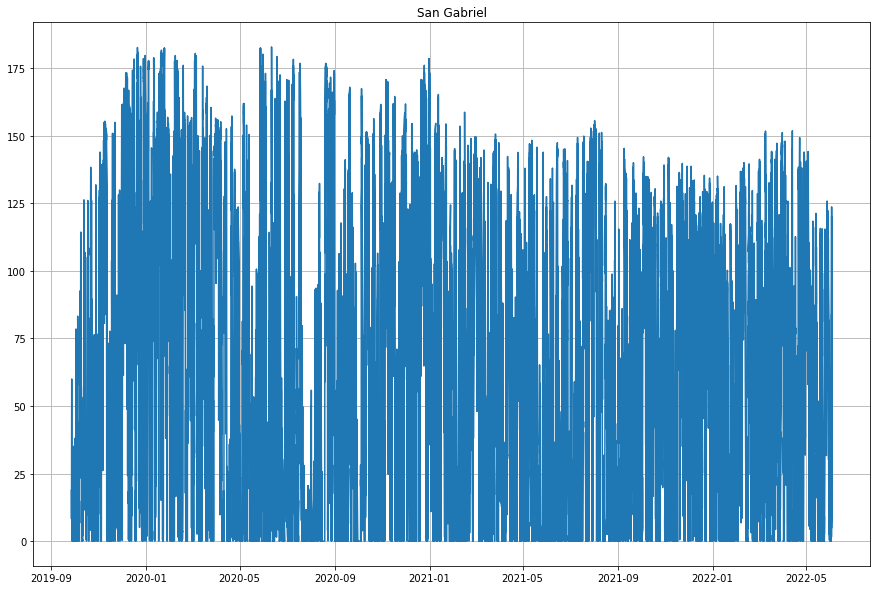

In [17]:
x=df_1.index
y=df_1["generacion_real_mwh"]
plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.grid()
plt.title("San Gabriel")
plt.show()


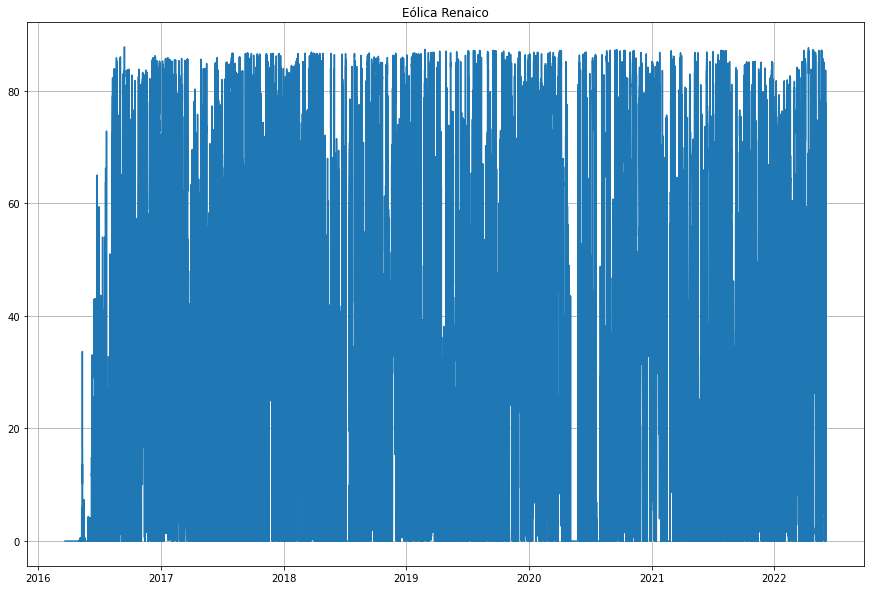

In [21]:
df_2=df4[df4["central_infotecnica_id"]==342]

x=df_2.index
y=df_2["generacion_real_mwh"]
plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.grid()
plt.title("Eólica Renaico")
plt.show()

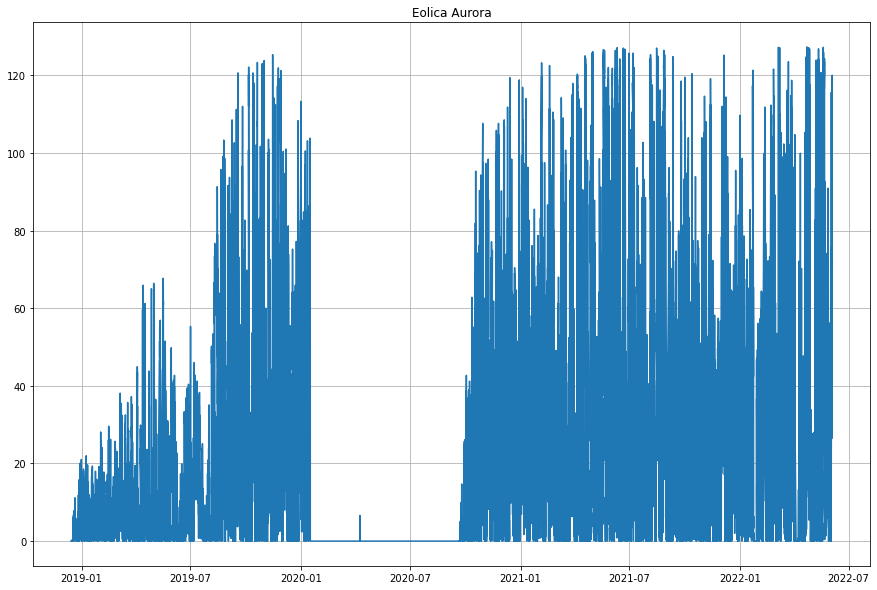

In [22]:
df_3=df4[df4["central_infotecnica_id"]==512]

x=df_3.index
y=df_3["generacion_real_mwh"]
plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.grid()
plt.title("Eolica Aurora")
plt.show()